TASK 5: we determine the best university:

In [71]:
import pickle
import pandas as pd
from IPython.display import display, HTML

merged = pd.read_pickle("merged.pkl")

In order to select the best university according to both rankings, we simply do the average of the rankings.
We just want to know the best university and there is no tie for the first one which is Stanford University.
In this case the ties between the other in the ranking does not matter, otherwise we would have broken these ties by putting first the university with the highest ranking. (Example: University of Cambridge (4) would be before Caltech (3) if we had to break the ties since it is ranked 2 in the second website)

In [44]:
merged['combine_rank'] = (merged['rank']+merged['rank_2'])/2

sorted_merged = merged.sort_values(['combine_rank'])
sorted_merged

,name,rank,country,region,fac_c_inter,fac_c_total,stu_c_inter,stu_c_total,rank_2,pc_intl_students(%),student_staff_ratio,combine_rank
1,Stanford University,2,United States,North America,2042.0,4285.0,3611.0,15878.0,3.0,22.0,7.5,2.5
0,Massachusetts Institute of Technology (MIT),1,United States,North America,1679.0,2982.0,3717.0,11067.0,5.0,34.0,8.7,3.0
3,California Institute of Technology (Caltech),4,United States,North America,350.0,953.0,647.0,2255.0,3.0,27.0,6.5,3.5
4,University of Cambridge,5,United Kingdom,Europe,2278.0,5490.0,6699.0,18770.0,2.0,35.0,10.9,3.5
5,University of Oxford,6,United Kingdom,Europe,2964.0,6750.0,7353.0,19720.0,1.0,38.0,11.2,3.5
2,Harvard University,3,United States,North America,1311.0,4350.0,5266.0,22429.0,6.0,26.0,8.9,4.5
7,Imperial College London,8,United Kingdom,Europe,2071.0,3930.0,8746.0,16090.0,8.0,55.0,11.4,8.0
8,University of Chicago,9,United States,North America,635.0,2449.0,3379.0,13557.0,9.0,25.0,6.2,9.0
9,ETH Zurich - Swiss Federal Institute of Techno...,10,Switzerland,Europe,1886.0,2477.0,7563.0,19815.0,10.0,38.0,14.6,10.0
12,Princeton University,13,United States,North America,246.0,1007.0,1793.0,8069.0,7.0,24.0,8.3,10.0


TASK 4 (a): Exploratory analysis
in the following, we check the consistency of the two datasets by creating a new dataframe comparing the information

In [56]:
comparison = pd.DataFrame(sorted_merged['name'])
comparison['rank_diff'] = pd.DataFrame.abs(sorted_merged['rank']-sorted_merged['rank_2'])
comparison['tab1_pc_intl_students'] = (sorted_merged['stu_c_inter']/sorted_merged['stu_c_total'])*100
comparison['tab2_pc_intl_students'] = sorted_merged['pc_intl_students(%)']
comparison['intl_pc_diff'] = pd.DataFrame.abs(comparison['tab1_pc_intl_students']-comparison['tab2_pc_intl_students'])
comparison['tab1_stu_staff_ratio'] = (sorted_merged['stu_c_total']/sorted_merged['fac_c_total'])
comparison['tab2_stu_staff_ratio'] = sorted_merged['student_staff_ratio'].astype(float)
comparison['stu_staff_ratio_diff'] = pd.DataFrame.abs(comparison['tab1_stu_staff_ratio']-comparison['tab2_stu_staff_ratio'])
comparison

,name,rank_diff,tab1_pc_intl_students,tab2_pc_intl_students,intl_pc_diff,tab1_stu_staff_ratio,tab2_stu_staff_ratio,stu_staff_ratio_diff
1,Stanford University,1.0,22.742159,22.0,0.742159,3.705484,7.5,3.794516
0,Massachusetts Institute of Technology (MIT),4.0,33.586338,34.0,0.413662,3.711268,8.7,4.988732
3,California Institute of Technology (Caltech),1.0,28.691796,27.0,1.691796,2.366212,6.5,4.133788
4,University of Cambridge,3.0,35.689931,35.0,0.689931,3.418944,10.9,7.481056
5,University of Oxford,5.0,37.287018,38.0,0.712982,2.921481,11.2,8.278519
2,Harvard University,3.0,23.478532,26.0,2.521468,5.156092,8.9,3.743908
7,Imperial College London,0.0,54.356743,55.0,0.643257,4.094148,11.4,7.305852
8,University of Chicago,0.0,24.924393,25.0,0.075607,5.535729,6.2,0.664271
9,ETH Zurich - Swiss Federal Institute of Techno...,0.0,38.168055,38.0,0.168055,7.999596,14.6,6.600404
12,Princeton University,6.0,22.220845,24.0,1.779155,8.012910,8.3,0.287090


In [58]:
comparison.describe()

,rank_diff,tab1_pc_intl_students,tab2_pc_intl_students,intl_pc_diff,tab1_stu_staff_ratio,tab2_stu_staff_ratio,stu_staff_ratio_diff
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,32.006623,23.250941,23.033113,2.188020,9.262510,16.323179,7.305810
std,27.998928,11.647165,11.742468,2.773228,3.993358,10.364545,8.482475
min,0.000000,3.418164,3.000000,0.030799,2.366212,4.100000,0.028328
25%,9.000000,15.004586,14.000000,0.454564,6.624079,10.700000,2.526418
50%,24.000000,22.468096,22.000000,1.341193,8.655738,13.900000,5.280702
75%,50.500000,29.007748,29.000000,2.788061,11.366091,18.400000,8.456650
max,126.000000,69.139344,71.000000,22.130277,23.936000,64.300000,55.644262


TODO: show with drawings + conclusions
TODO: correlations between different columns

TASK 4 (b): Exploratory analysis
in the following, we check the possible correlations of the different statistics with the ranks of the universities

The student/staff ratio against the rank of the university according to the second website

TODO: conclusions from scatterplots

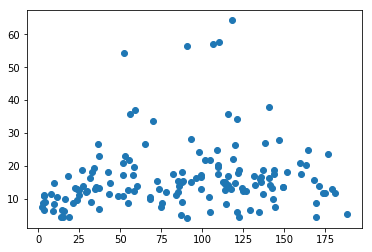

In [70]:
import matplotlib.pyplot as plt
plt.scatter(sorted_merged['combine_rank'], sorted_merged['student_staff_ratio'])
plt.show()

The student/staff ratio against the rank of the university according to the first website

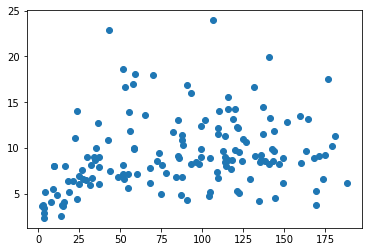

In [69]:
plt.scatter(sorted_merged['combine_rank'], comparison['tab1_stu_staff_ratio'])
plt.show()

The international student percentage against the rank of the university according to the second website

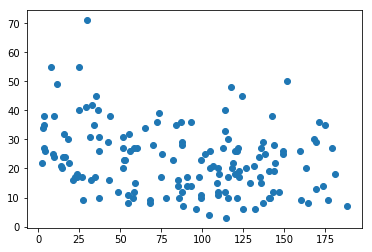

In [67]:
plt.scatter(sorted_merged['combine_rank'], sorted_merged['pc_intl_students(%)'])
plt.show()

The international student percentage against the rank of the university according to the second website

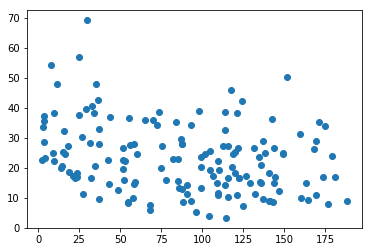

In [68]:
plt.scatter(sorted_merged['combine_rank'], comparison['tab1_pc_intl_students'])
plt.show()